# Seaborn - Telling Stories with Data 

Seaborn's official website states, "If matplotlib “tries to make easy things easy and hard things possible”, seaborn tries to make a well-defined set of hard things easy too."

Seaborn is a data visualisation library built over matplotlib that can easily generate 'production ready' plots. Seaborn's high level interface combined with the customisability of matplotlib allows generaration of publication worthy visuals with ease.

Here is a demonstration of the difference between matplotlib and seaborn:

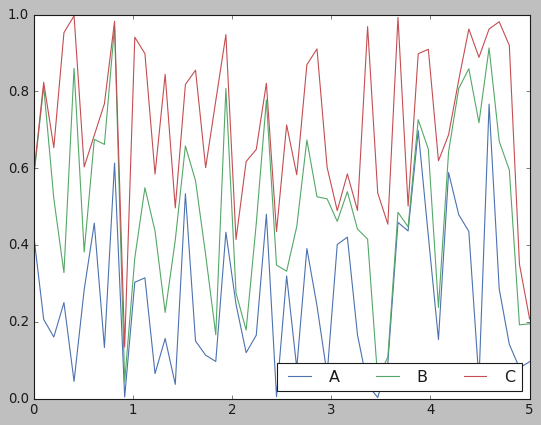

In [93]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import random
import warnings
warnings.filterwarnings('ignore')
plt.style.use('classic')
random.seed(10)

x = np.linspace(0.0, 5.0)
y = [sorted([random.random() for _ in range(3)]) for _ in range(50)]

plt.plot(x, y)
plt.legend('ABCDE', ncol=5, loc='lower right')

The matplotlib plot is very basic and not visually appealing. The same data when plotted with seaborn produces a much more visually appealing figure.

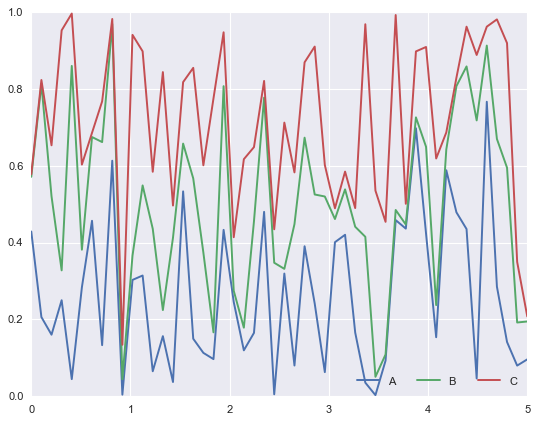

In [94]:
import seaborn as sns
sns.set(color_codes = True)
plt.plot(x, y)
plt.legend('ABCDE', ncol=5, loc='lower right')

Some features that seaborn offers:
1. Built in visually appealing asthetics and tools to access to custom colour palettes
2. Functions to visualise distributions, metrics and statistical timeseries data 
3. Tools to fit and visualise models 
4. High level abstractions to design plot grids

This tutorial will not only explore the plots and visuals associated to seaborn but will also shed light on concepts behind the visualisations.

# Importing a Dataset

We will first import a Pokemon dataset to use in parts of the the tutorial. 


In [95]:
import csv
import os
os.chdir('/Users/rituparnaj/Desktop')

pokemon = pd.read_csv("Pokemon.csv", encoding='latin-1')

The Pokemon dataset describes pokemon and their characteristics.

Here's what the dataset looks like,

In [96]:
pokemon.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
3,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


# Exploring plotting functions

Seaborn provides numerous plotting functions useful for statistical data exploration. One of the first things to do with a new data set is to understand the distribution of data.

## Data Distribution

Let us look at plotting a univariate distribution. We will plot the Total ability of all pokemon as a distribution.

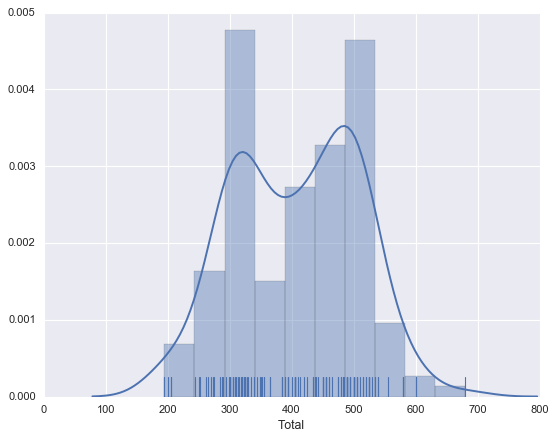

In [97]:
sns.distplot(pokemon.Total, hist = True, kde=True, bins = 10, rug=True)

## Univariate Distributions : distplot()

The easiest way to visualise a univariate distribution is distplot(). It combines matplotlib's hist() with seaborn's kdeplot() and rugplot()

By default, this plots a histogram and a kernel density estimation, which is a smooth estimate of the distribution. 

1. hist() plots the histogram
2. kdeplot() plots only the kernel density estimation
3. rugplot() plots datapoints as sticks on an axis


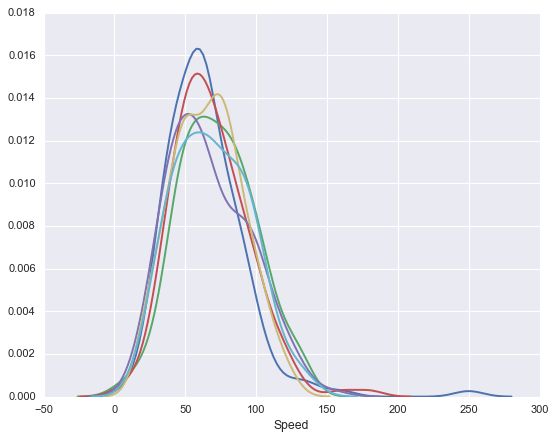

In [98]:
cl = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
for col in cl:
    sns.distplot(pokemon[col], hist = False, kde=True, rug=False)

This is a kernel density estimation of 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed' of the Pokemon using distplot()

On passing two dimensional data, Attack and Special attack to distplot:

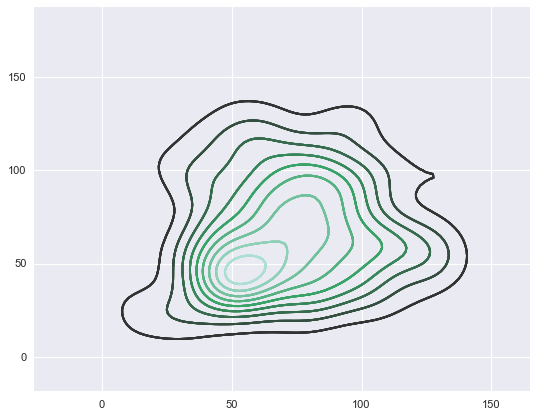

In [99]:
df = pd.DataFrame(pokemon, columns=['Attack', 'Sp. Atk'])

for col in cl:
    sns.distplot(df, hist = False, kde=True, rug=False)

## Bivariate Distributions : jointplot()

The easiest way to visualise a bivariate distribution is a jointplot(). A jointplot() shows the relationship between the variables and also shows the distribution of each variable (univariate).

There are many differnt kinds of plots that a jointplot() can generate. These are specified by the value of a 'kind' parameter,

1. scatter (default)
2. reg
3. resid
4. kde
5. hex 

A scatter plot is an easy way to see the relationship between two variables. kind = reg plots a regression line in the scatterplot and kde with the histogram

Here is a plot of the speed of a pokemon plotted against HP.

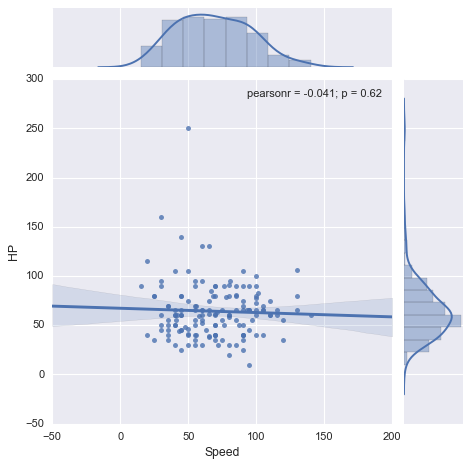

In [100]:
sns.jointplot(x=pokemon.Speed, y=pokemon.HP, kind="reg")

hex produces a joint histogram using hexagonal bins

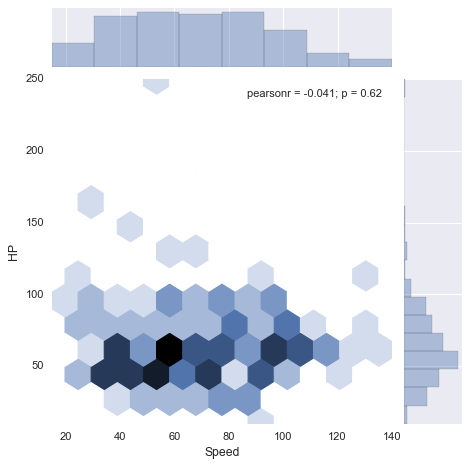

In [101]:
sns.jointplot(x=pokemon.Speed, y=pokemon.HP, kind="hex")

A jointplot is an interface to the jointGrid class. It returns a jointGrid object which can be used to make further modifications. 

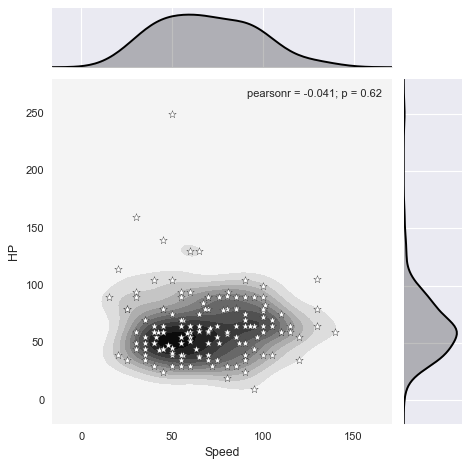

In [102]:
p = sns.jointplot(x=pokemon.Speed, y=pokemon.HP, kind="kde", color = 'black')
p.plot_joint(plt.scatter, marker = '*', s = 50, c = "w") #s specifies size, c specifies color of the marker

# pairplot()

Pairplot() shows the relationship between all plots in a matrix. It also plots the univariate distribuion along the diagonal.

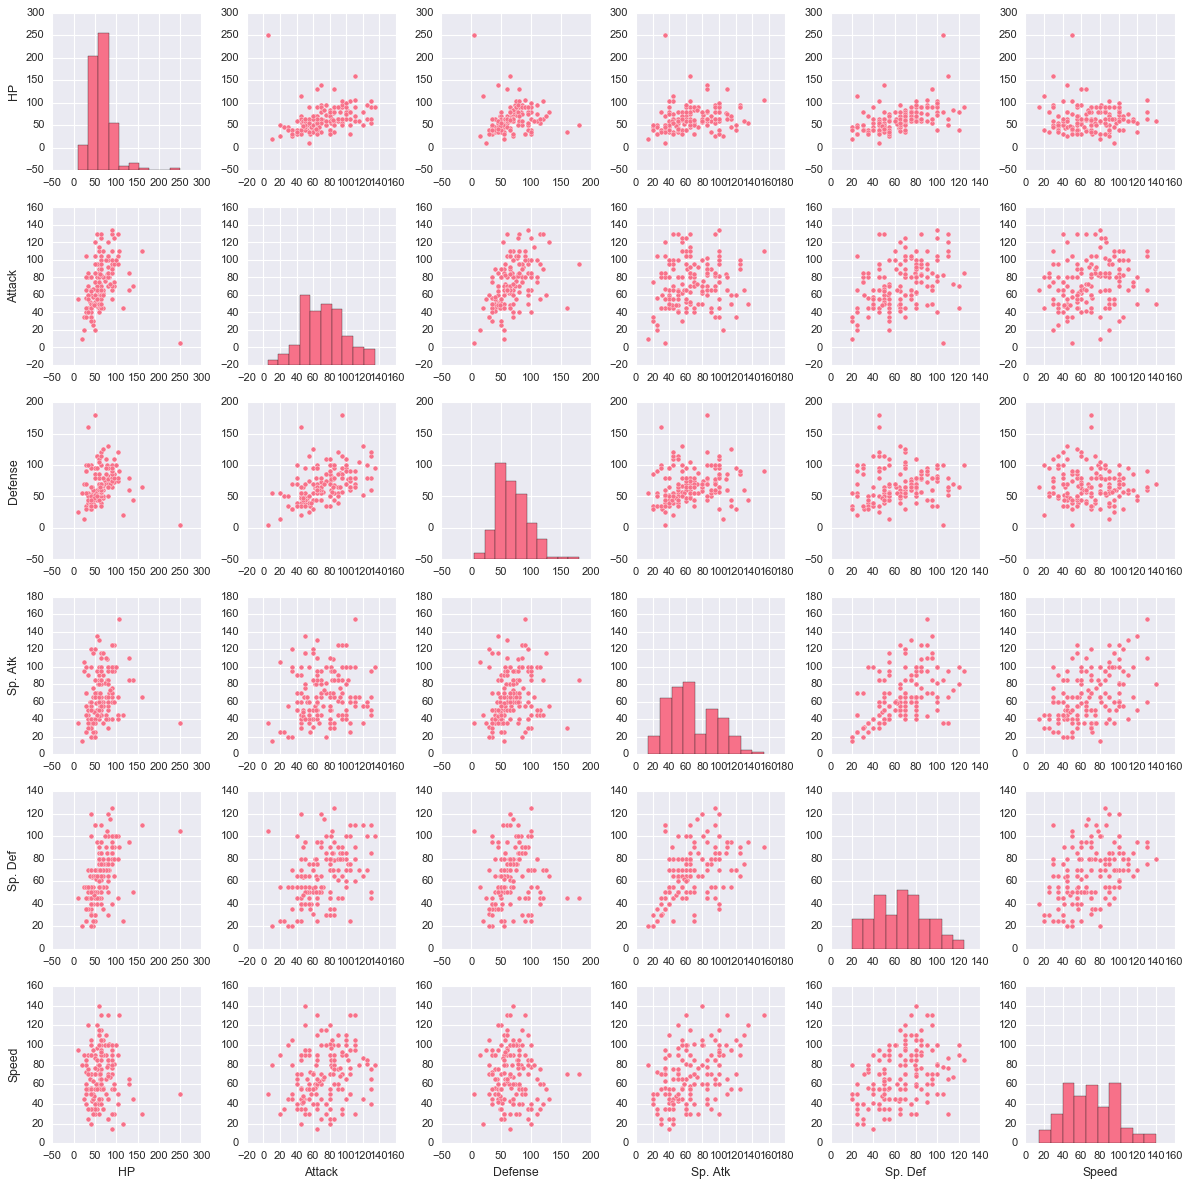

In [146]:
cl = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
p1 = pd.DataFrame(columns = cl)
for col in cl:
    p1[col] = pokemon[col]
sns.pairplot(p1)

Similar to jointplot, pairplot() is an interface for the pairGrid class. It returns a pairGrid object which can be used for further modification.

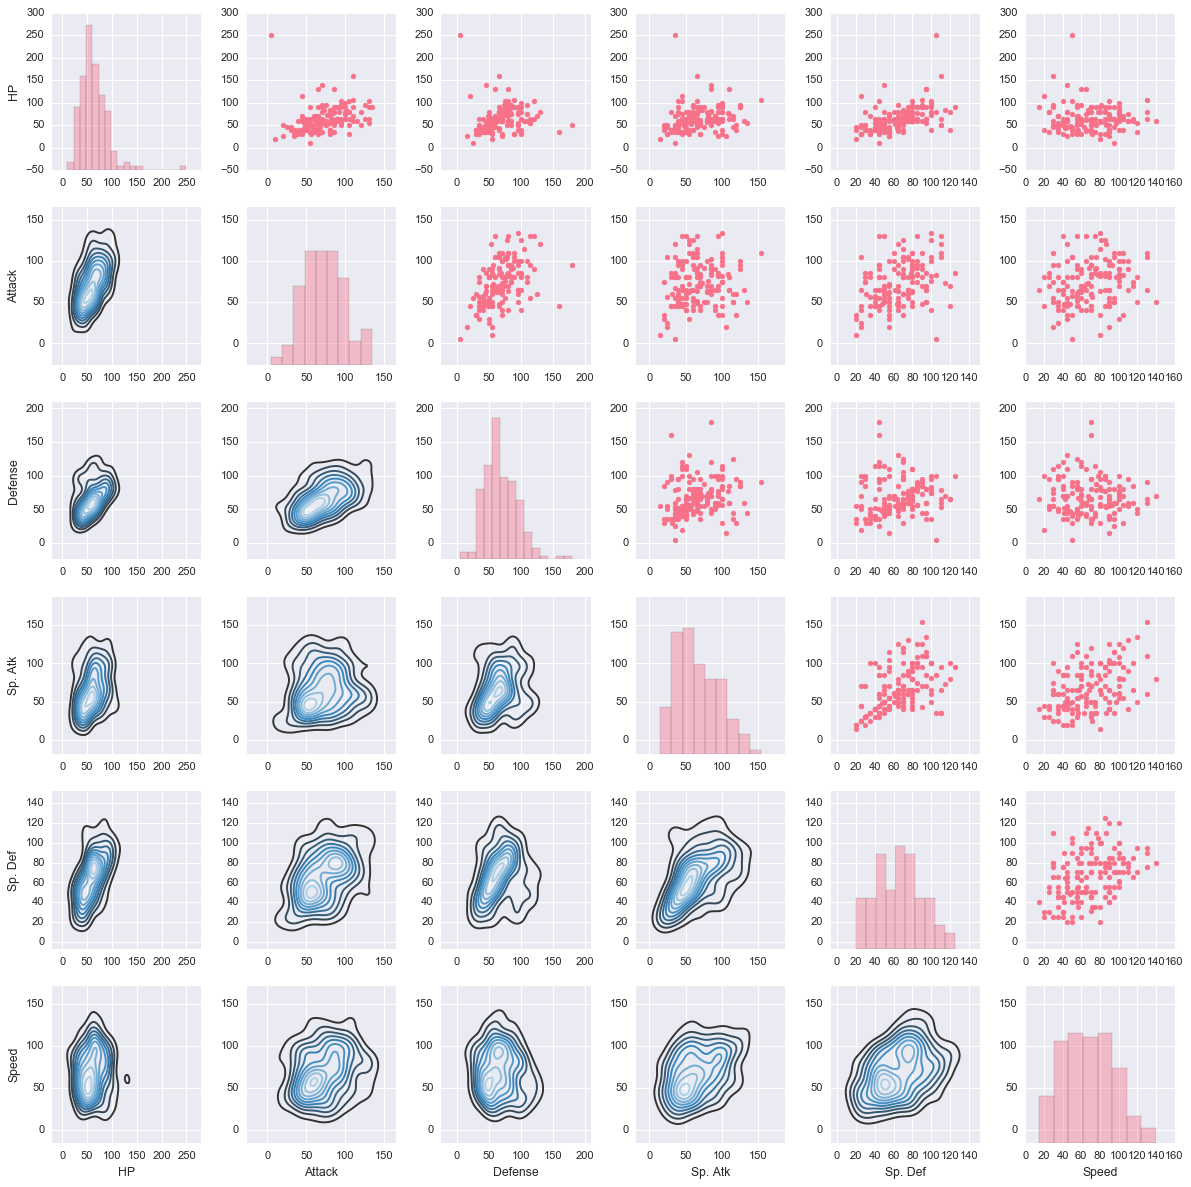

In [147]:
g = sns.PairGrid(p1, palette=["red"])
g.map_upper(plt.scatter)
g.map_diag(sns.distplot, kde=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")

# Linear Regression

Seaborn also has functions to model and visualise linear regressions. While seaborn can model regressions, it is not built for statistical modelling. Statsmodels can be used for advanced statistical modelling.

There are two main functions used for regression. lmplot() and regplot(). We will not explore the features and differences between the functions to help us decide which function to use in what circumstance. 

## lmplot() vs regplot()

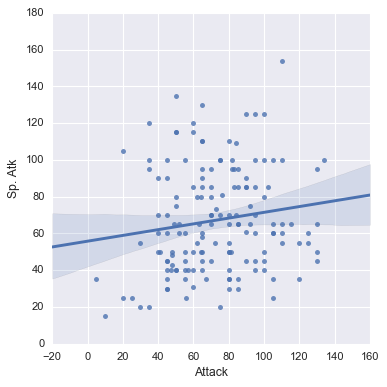

In [105]:
sns.lmplot(x="Attack", y="Sp. Atk", data = pokemon)

lmplot() has a certain signature that needs to be followed. The x and y parameters require a string. They do not accept a data frame or series object. regplot() on the other hand, allows any type to be supplied to x and y, it is more flexible in terms of the data it handles.

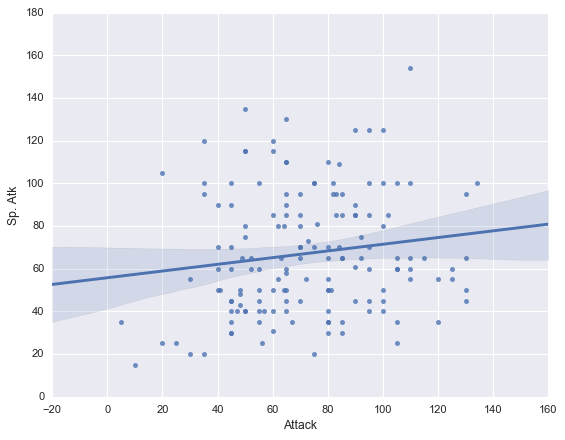

In [106]:
sns.regplot(pokemon["Attack"],pokemon["Sp. Atk"])

# Polynomial Regression
When the relationship between two variables is more complex, a higher order regression will be required. Seaborn makes it easy to fit regressions of varying orders. To demonstrate and visualise a non-linear regression, we will use Anascombe's Quartet.

Anascombe's Quartet is a very interesting collection of data. It contains 4 datasets that have the same statistics but are different when visualised. 

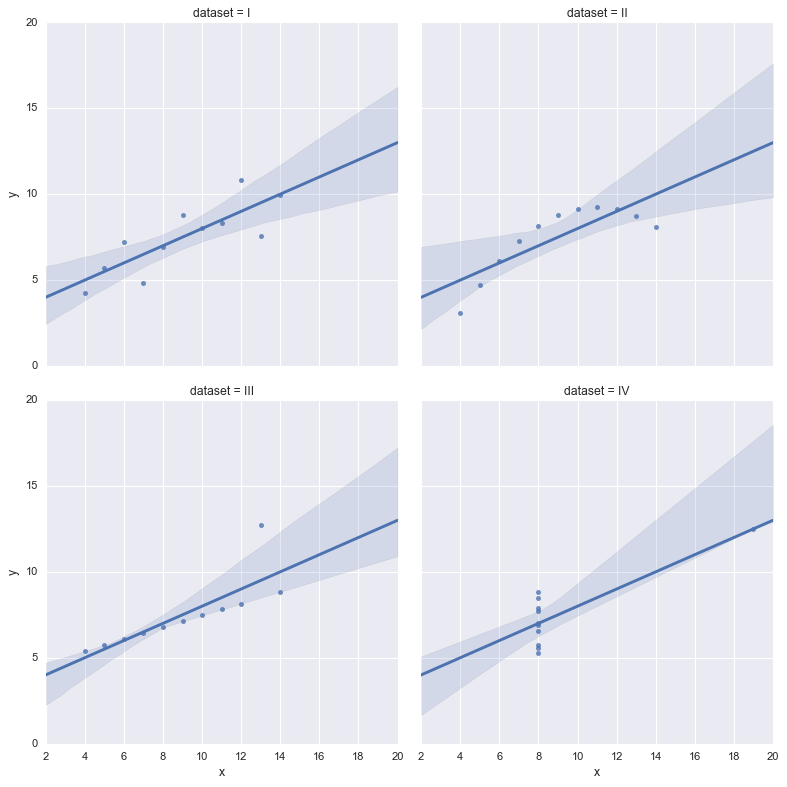

In [107]:
df = sns.load_dataset("anscombe")
sns.lmplot(x="x", y="y", col = "dataset", col_wrap = 2, data = df)

While it is clear that these datasets have vastly different spreads, the summary statistics of all of them are the same. Data like this is the reason why visualisation is an extremely important step in any kind of data analysis. It is simply not enough to rely on summary statistics.

residplot() can be used to check the appropriateness of a regression model. It fits a linear regression and plots residuals for the observations. In the best case, these are random and scattered around y = 0.

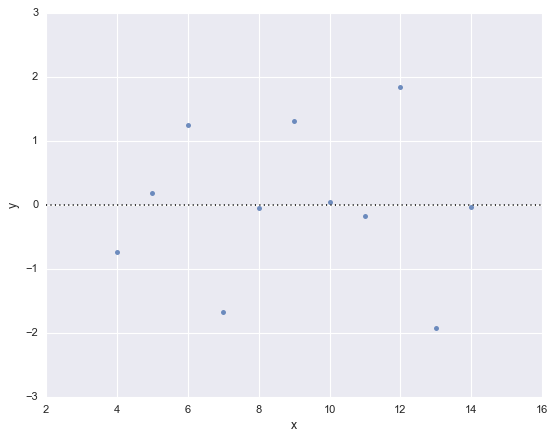

In [108]:
df1 = df.loc[df['dataset'] == 'I']
sns.residplot(x="x", y="y", data=df1);

It is clear here that the points are evenly and randomly scattered around y = 0. 

In the figure below it is evident that there is a certain pattern to the points around the line and they are not random. Here we know that a liner regression is not appropriate. We need to fit a higher order regression. 

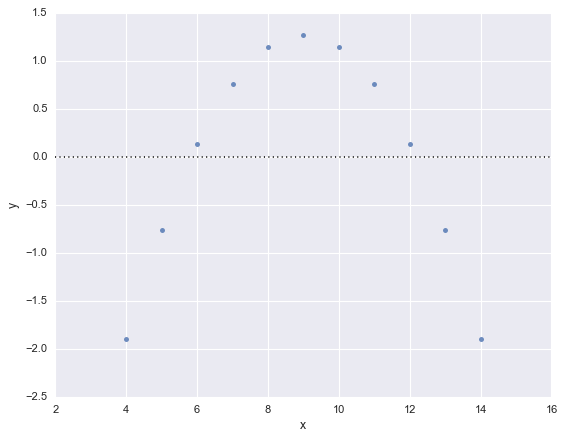

In [109]:
df2 = df.loc[df['dataset'] == 'II']
sns.residplot(x="x", y="y", data=df2);

To fit a better regression we need to consider a higher order regression. 

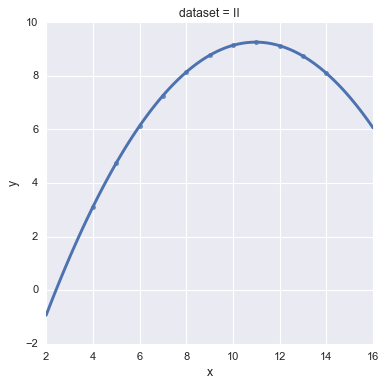

In [110]:
sns.lmplot(x="x", y="y", col = "dataset", order = 2, data = df2)

The order parameter is used to dictate the order of the polynomial regression. It uses numpy.polyfit to determine the n order regression. 

With order 2, the regression fits much better!

Another scenario to consider is a dataset with outliers. Like the one below.

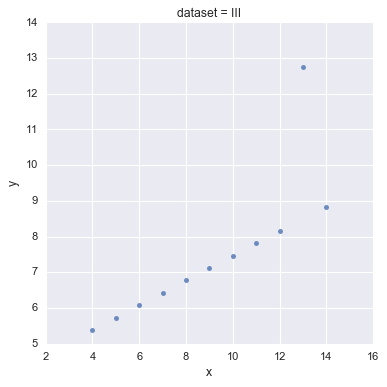

In [111]:
df3 = df.loc[df['dataset'] == 'III']
sns.lmplot(x="x", y="y", col = "dataset", fit_reg = False, data = df3) #fir_reg can be used to hide the regression line

Fitting a regression to this data is not accurate. Let us explore why.

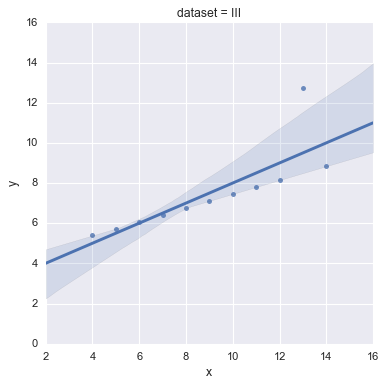

In [112]:
sns.lmplot(x="x", y="y", col = "dataset", data = df3) 

The regression line is pulled to the top by the outlier. The correct regression would look like the one below. 

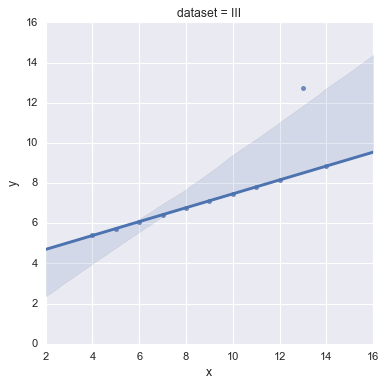

In [113]:
sns.lmplot(x="x", y="y", col = "dataset", robust = True, data = df3) 

Seaborn uses statsmodels to fit a robust regression that assigns low weights to outliers. 

Seaborn offers up other options for regression as well,
- logx
- lowess
- logistic

Logx plots a linear regression of the form, y ~ log(x)

Lowess utilises statsmodels to plot a locally weighted linear regression

Logistic is used to plot a regression line when the dependant variable is categorical. 

Let's take a look at an example for logistic regression.

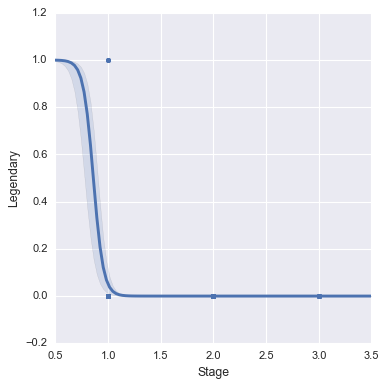

In [114]:
sns.lmplot(x="Stage", y="Legendary", logistic = True, data = pokemon) 

It is very useful to visualise the relationship between two variables. Sometimes adding a thrid variable to the mix is required to get a complete picture of variable interactions. 

A combination of regplot(), lmplot() and facetgrid is used to get these kinds of visuals.

Let us now look at the pokemon dataset once again. If i want to see the relationship between attack and speed of a pokemon based on wether they are legendary or not, I could do this!

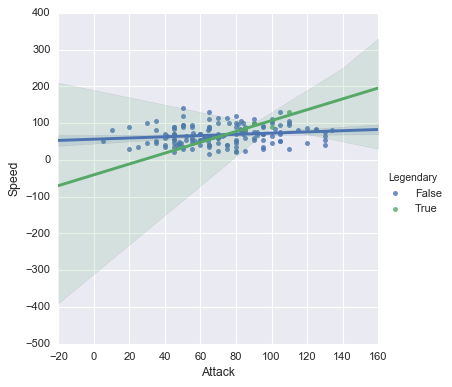

In [115]:
sns.lmplot(x="Attack", y="Speed", hue="Legendary", data=pokemon)

The figure is too small to properly observe distribution of the points. We will increase the size of the plot. 

Here we observe another diference between regplot() and lmplot(). 

With lmplot(), the properties of FacetGrid are used to manipulate the size and shape in the plot. 

On the other hand, regplot() offers much more control. It is an axis-level function that allows us to control where the regression should be plotted. 

Let me illustrate the differences with an example.


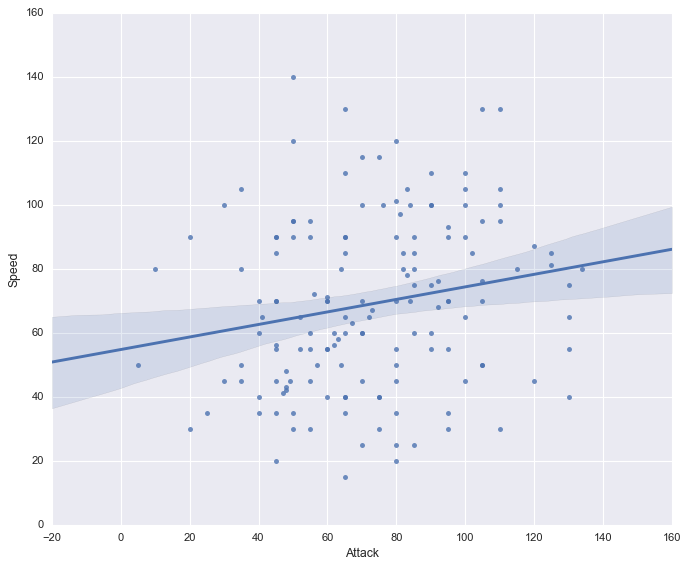

In [116]:
f, ax = plt.subplots(figsize=(10, 8))
sns.regplot(pokemon.Attack, pokemon.Speed, ax=ax)

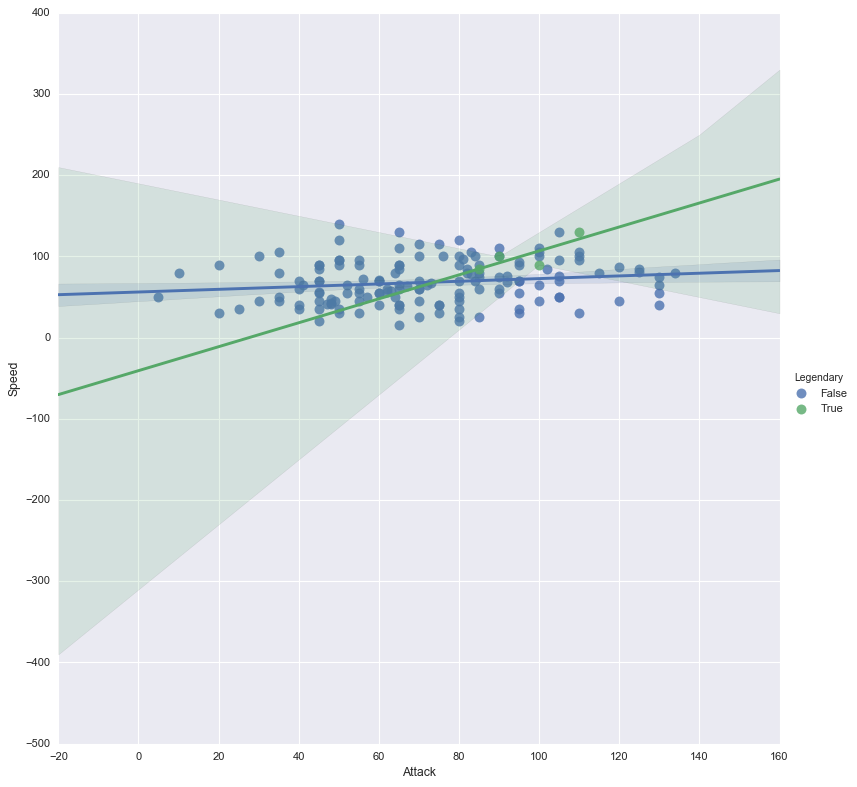

In [117]:
sns.lmplot(x="Attack", y="Speed", hue="Legendary", data=pokemon,size=10, scatter_kws={"s": 80})

Although the points are easier to see, it is hard to distinguish them. To make the plot easier to read, we can change some of the points to different shapes.

The shapes of the points are controlled by the 'marker' parameter as we saw above.

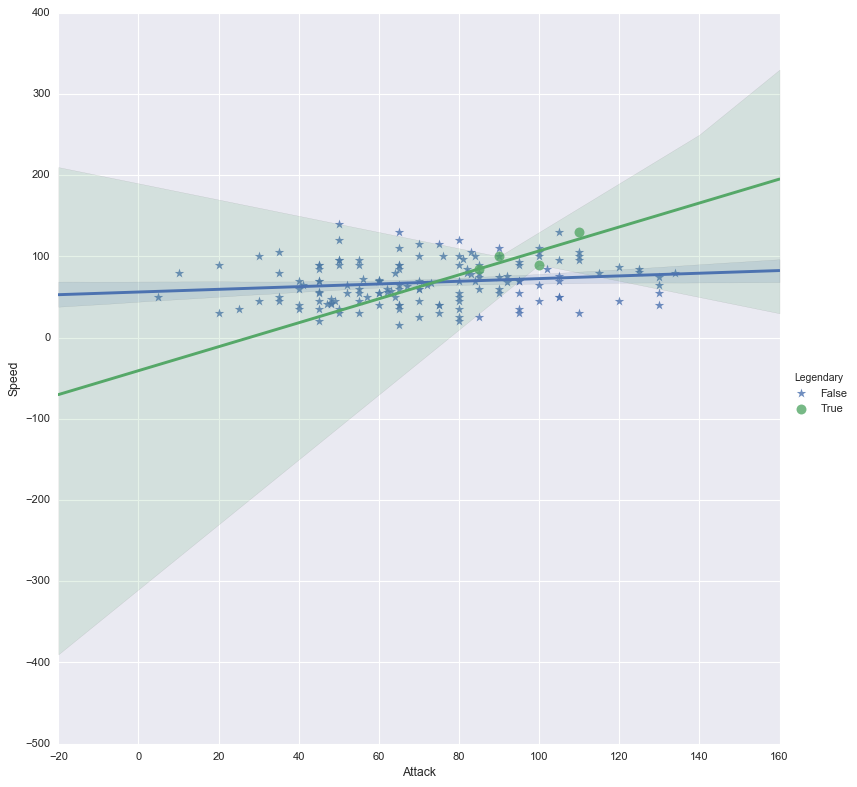

In [118]:
sns.lmplot(x="Attack", y="Speed", hue="Legendary", data=pokemon ,markers=["*", "o"], size = 10, scatter_kws={"s": 80})

This is a much more visible and clear plot. Changing the colour scheme would help make the plot easier to read. We will explore colour palettes in the next section.

# Colour Palettes

The purpose if visualisation is to highlight and showcase data. One of the best ways to do this is with colour. 

There are three colour concepts to keep in mind,
1. Sequential - Using a single hue with varying shades to show that they are a part of one group but are sequential.
2. Divergent - Using two hues and gradually bringing the colour scheme to a single neutral hue.
3. Qualititive - Using a different hue for different elements/values

Seaborn has numerous functions to truly customise and use different colour palettes.

## color_palette()


This function returns a the current color cycle by default. If a palette or colormap is specified, it returns list of colors (RGB) in the palette. There are six available palettes - 
deep, muted, bright, pastel, dark, colorblind

Let us take a look at what the current palette is and what these existing named palettes look like.

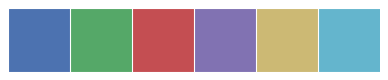

In [119]:
sns.palplot(sns.color_palette()) 

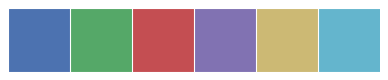

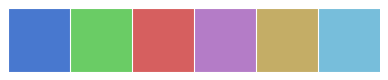

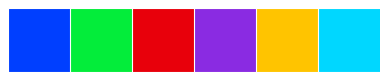

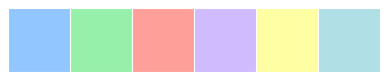

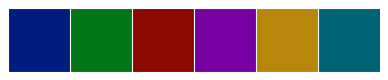

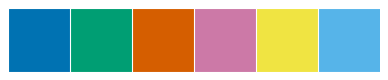

In [120]:
sns.palplot(sns.color_palette("deep")) #it looks like the current pallete is set to deep!
sns.palplot(sns.color_palette("muted"))
sns.palplot(sns.color_palette("bright"))
sns.palplot(sns.color_palette("pastel"))
sns.palplot(sns.color_palette("dark"))
sns.palplot(sns.color_palette("colorblind"))

This function also accepts matplotlib colormaps and a list of colours specified in a valid matplotlib format.

To generate new colors, seaborn generates different hues of existing colors. This can be set using the hls colourspace which changes the brightness and saturation to generate new colors.

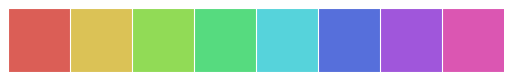

In [122]:
sns.palplot(sns.color_palette("hls", n_colors = 8))

color_palettes() can also use matplotlib colourmaps. You can explore all of matplotlib's colourmaps at this great reference, https://matplotlib.org/tutorials/colors/colormaps.html

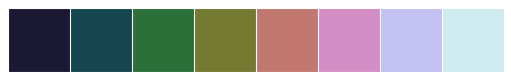

In [123]:
sns.palplot(sns.color_palette("cubehelix", n_colors=8))

To have more control over the brightness and sturation of the colours, a hls_palette can be used. 
hls stands for hue, lightness and saturation.

Let's take a look at the difference in lightness and saturation for the same hue.

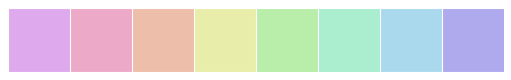

In [124]:
sns.palplot(sns.hls_palette(8,h =.8, l=.8))

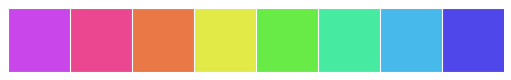

In [125]:
sns.palplot(sns.hls_palette(8,h =.8, s=.8))

Human vision is such that it does not percieve intensity of all colours in the same way. So, although the saturation and brightness of all colors is the same, some are less intense than others. 

To remedy this, Seaborn has a husl_palette and a HSLuv function (formerly called husl) which is a 'human friendly' option to HSL. 
You can experiment with human human colour perception at http://www.hsluv.org to pick the right values for lightness and sturation in your projects!

See the difference for yourself!!

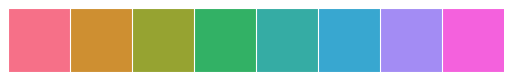

In [126]:
sns.palplot(sns.color_palette("husl", 8))

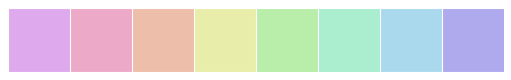

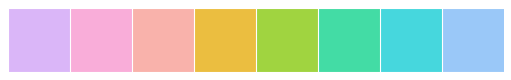

In [127]:
sns.palplot(sns.hls_palette(8,h =.8, l=.8))
sns.palplot(sns.husl_palette(8, h=.8, l=.8))

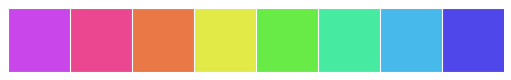

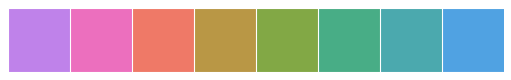

In [128]:
sns.palplot(sns.hls_palette(8,h =.8, s=.8))
sns.palplot(sns.husl_palette(8, h=.8, s=.8))

## Color Brewer Palettes
Color Brewer offers tons of palettes and color combinations to work with. Seaborn offers an extremely cool choose_colorbrewer_palette() interactive widget to help you select a palette.

You have the option to specify the data type which corrosponds to wether you want to use a qualitative, divergent or sequential palette.

A Jupyter Widget

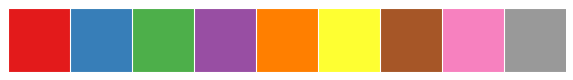

A Jupyter Widget

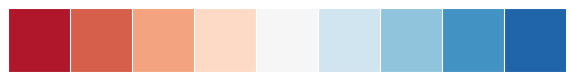

A Jupyter Widget

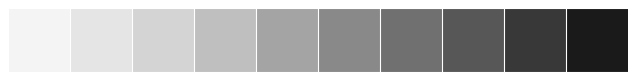

In [129]:
sns.palplot(sns.choose_colorbrewer_palette("q", as_cmap=False))
sns.palplot(sns.choose_colorbrewer_palette("d", as_cmap=False))
sns.palplot(sns.choose_colorbrewer_palette("s", as_cmap=False))

If all of these available pallets are not sufficient. You can create your own list of colors from a list of 954  colors with the function xncd_palette(). You can look up the available colours at, https://xkcd.com/color/rgb/

Bringing back some childhood memories, there is also a crayola crayon palette where you can use names of crayola crayons in your list using .crayon_palette(colors).

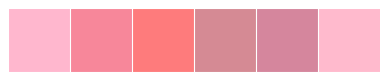

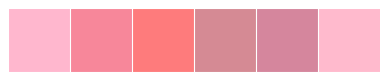

In [130]:
color_list = ['#ffb7ce', '#f7879a', '#fe7b7c', '#d58a94', '#d5869d', '#ffbacd'] #pink shades with rgb values
sns.palplot(sns.color_palette(color_list))
color_list = ["baby pink","rose pink","salmon pink","dusty pink","dull pink","pastel pink"] #pink shades by name
sns.palplot(sns.xkcd_palette(color_list))

# cubehelix_palette()

A very handy function to generate sequential palettes in Seaborn is cubehelix_palette(). It allows us to increase or decrease lightness and slightly very the hue.

While matplotlib has a cubehelix map that looks like this,

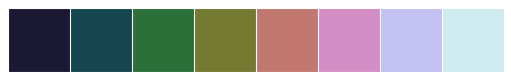

In [131]:
sns.palplot(sns.color_palette("cubehelix", 8))

Seaborn offers greater customisability with its cubehelix_palettes() function which uses the cubehelix system. You can choose the start position in the rgb color space, rotations around the wheel, a gamma factor to indicate light or dark colours and more.

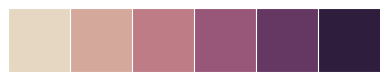

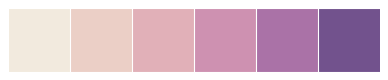

In [132]:
sns.palplot(sns.cubehelix_palette(start=0, rot=.5))
sns.palplot(sns.cubehelix_palette(start=0, rot=.5, gamma = 0.5))

This function also comes with an interactive widget, choose_cubehelix_palette.

A Jupyter Widget

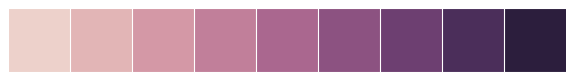

In [133]:
sns.palplot(sns.choose_cubehelix_palette(as_cmap=False))

# Sequential, Divergent and Qualitative visual difference

There is such a huge variety of colours and palettes you can explore with Seaborn. Here's a few that will give you a better idea of Sequential, Divergent and Qualitative.

The first three are Sequential, the next three are Divergent and the last 3 are Qualitative.

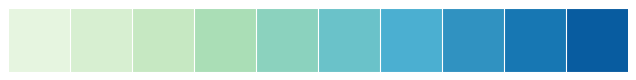

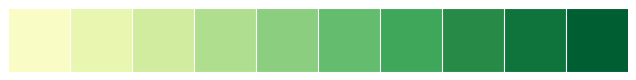

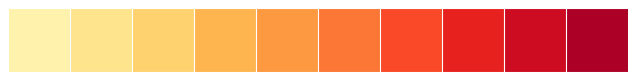

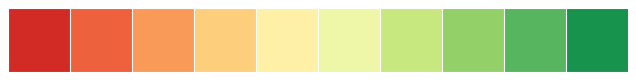

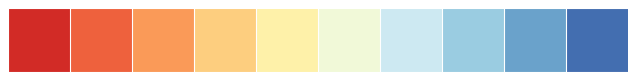

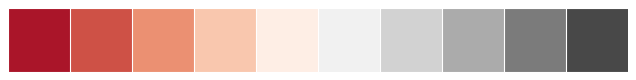

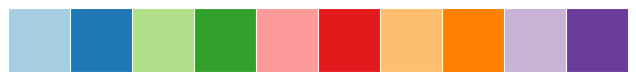

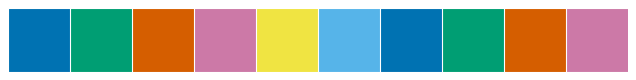

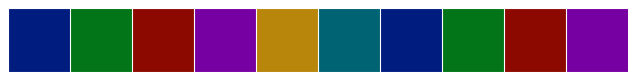

In [144]:
sns.palplot(sns.color_palette("GnBu", 10))
sns.palplot(sns.color_palette("YlGn", 10))
sns.palplot(sns.color_palette("YlOrRd", 10))
sns.palplot(sns.color_palette("RdYlGn", 10))
sns.palplot(sns.color_palette("RdYlBu", 10))
sns.palplot(sns.color_palette("RdGy", 10))
sns.palplot(sns.color_palette("Paired", 10))
sns.palplot(sns.color_palette("colorblind", 10))
sns.palplot(sns.color_palette("dark", 10))

# Setting the Default color palette

In [136]:
sns.set_palette("husl")

# Manipulating Aesthetics
Seaborn has 5 figure themes - darkgrid, whitegrid, dark, white, and ticks

Let's see what they look like with the pokemon dataset.

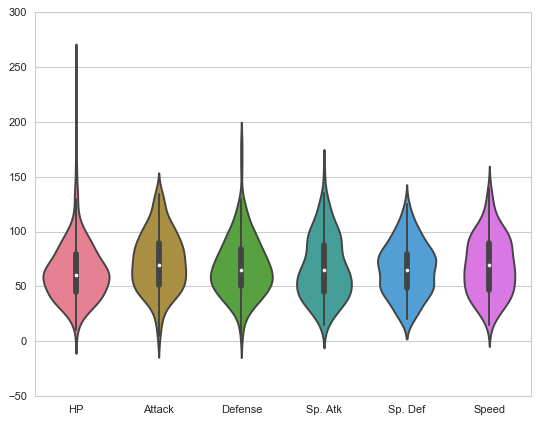

In [150]:
sns.set_style("whitegrid")
sns.violinplot(data=p1)

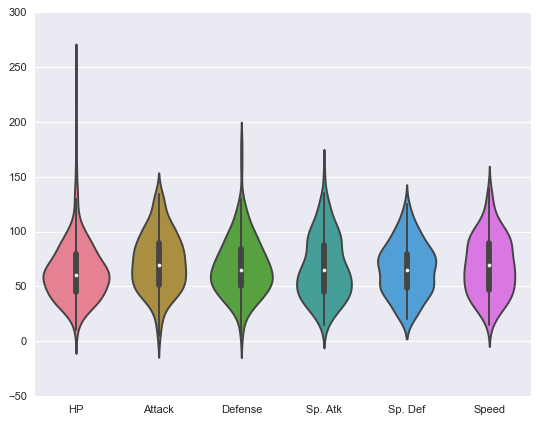

In [151]:
sns.set_style("darkgrid")
sns.violinplot(data=p1)

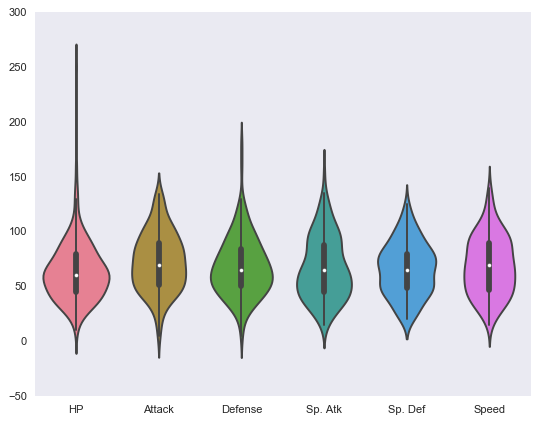

In [152]:
sns.set_style("dark")
sns.violinplot(data=p1)

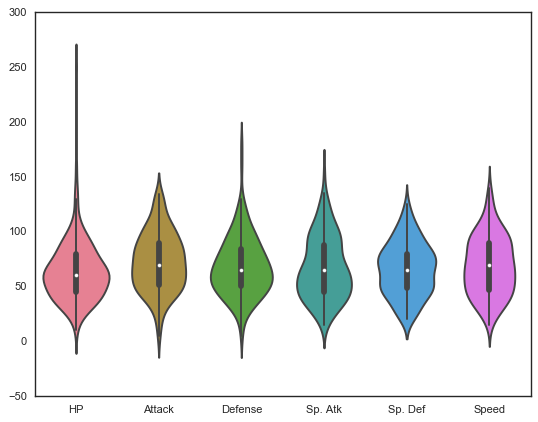

In [153]:
sns.set_style("white")
sns.violinplot(data=p1)

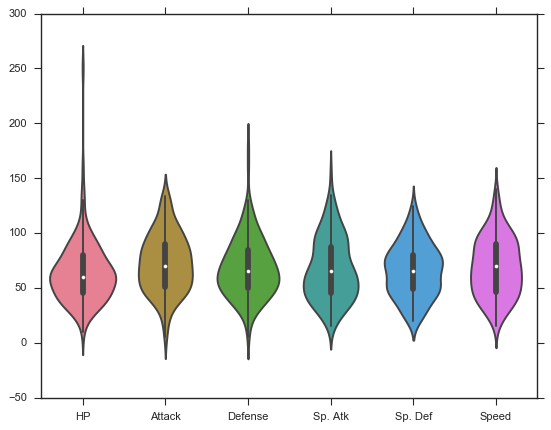

In [154]:
sns.set_style("ticks")
sns.violinplot(data=p1)

We can also play around with sizes and dimensions of the plots and its elements.

There are 4 scaling contexts - paper, notebook, talk, and poster

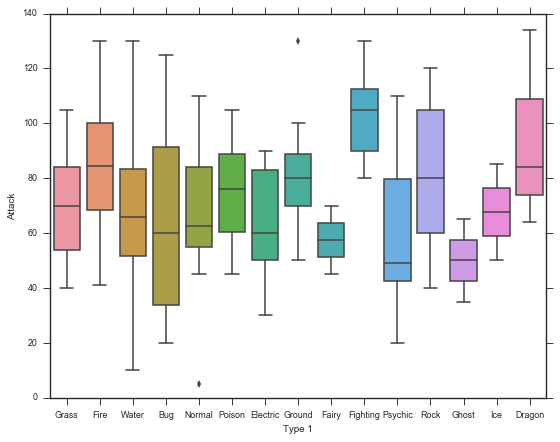

In [160]:
sns.set_context("paper")
sns.boxplot(x=pokemon["Type 1"], y=pokemon.Attack)

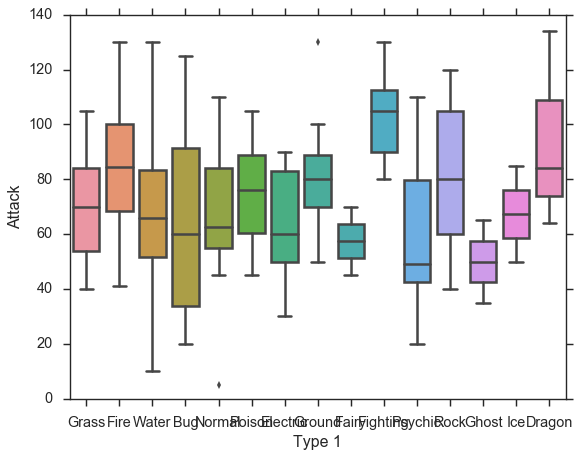

In [179]:
sns.set_context("talk")
sns.boxplot(x=pokemon["Type 1"], y=pokemon.Attack)

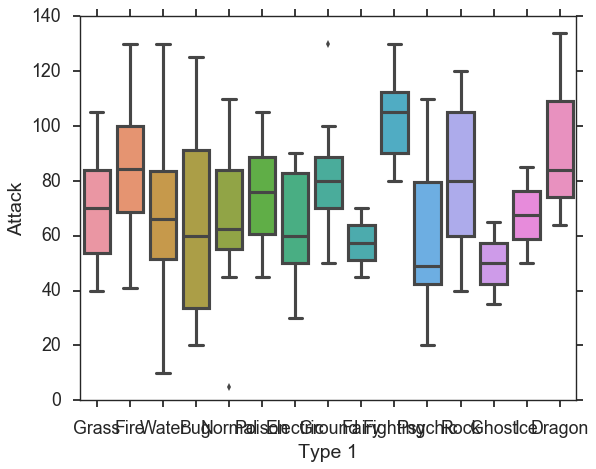

In [180]:
sns.set_context("poster")
sns.boxplot(x=pokemon["Type 1"], y=pokemon.Attack)

Finally, if you want revert to default, you should use -

In [183]:
sns.set()

If you want to dive into greater detail about any aspect of this tutorial, the Seaborn documentation contains a tutorial and a great API so you can try stuff out yourself!

Hope this tutorial helped give you an insight into how fun Data Visualisation with Seaborn can be!!